In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataframe = pd.read_csv('/Users/joeypaulelihaynes/ALAN/MSAccess/NWSD/STRIKE_REPORTS.csv', low_memory=False)

# Print the first 25 rows.
dataframe.head(25)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996 0:00:00,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
1,608243,6/26/1996 0:00:00,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
2,608244,7/1/1996 0:00:00,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
3,608245,7/1/1996 0:00:00,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
4,608246,7/1/1996 0:00:00,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
5,608247,5/6/1991 0:00:00,5,1991,NaN,Day,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,...,Medium,NaN,NaN,SOURCE = FAA FROM 3830 /Legacy Record=100006/,REDACTED,REDACTED,Other,Pilot,11/21/1997 0:00:00,0
6,608248,11/5/1993 0:00:00,11,1993,NaN,Dawn,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,Medium,NaN,NaN,"THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...",REDACTED,REDACTED,FAA Form 5200-7,NaN,5/13/1998 0:00:00,0
7,608249,7/2/1995 0:00:00,7,1995,NaN,NaN,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,Medium,NaN,NaN,/Legacy Record=100008/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
8,608250,9/19/1990 0:00:00,9,1990,NaN,Day,KDFW,DALLAS/FORT WORTH INTL ARPT,32.89595,-97.03720,...,Small,NaN,NaN,/Legacy Record=100009/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,1/21/1999 0:00:00,0
9,608251,5/3/1992 0:00:00,5,1992,NaN,Day,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,37.36186,-121.92901,...,Small,NaN,NaN,A/C = FAIRCHILD METRO II (5/8/14 UPDATED A/C) ...,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/8/2014 0:00:00,0


In [35]:
# Mean incident year
dataframe['INCIDENT_YEAR'].mean()

2011.6139050982802

In [36]:
# Latest incident year
dataframe['INCIDENT_YEAR'].max()

2023

In [37]:
# Earliest incident year
dataframe['INCIDENT_YEAR'].min()

1990

In [38]:
# Most commonly reported species of bird
dataframe['SPECIES'].mode()

0    Unknown bird - small
Name: SPECIES, dtype: object

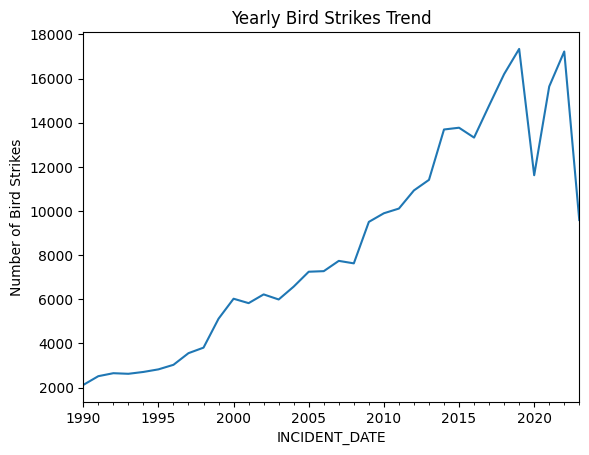

In [39]:
# Trend analysis (yearly bird strikes)
dataframe['INCIDENT_DATE'] = pd.to_datetime(dataframe['INCIDENT_DATE'])
dataframe.set_index('INCIDENT_DATE', inplace=True)
dataframe.resample('Y').size().plot(title='Yearly Bird Strikes Trend')
plt.ylabel('Number of Bird Strikes')
plt.show()

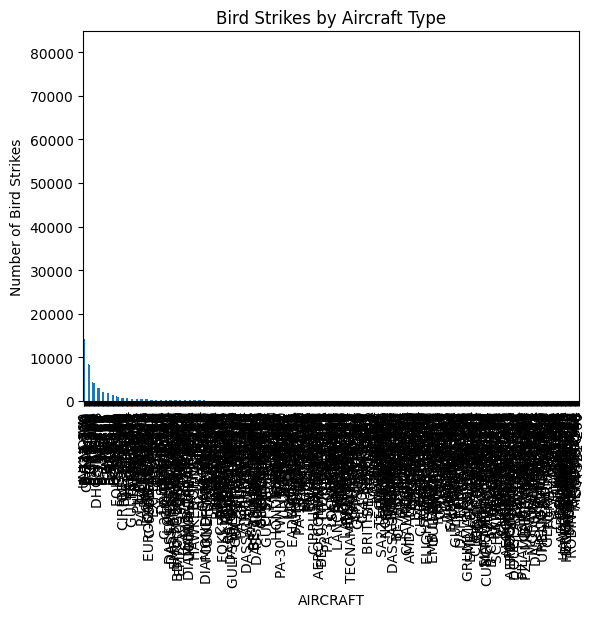

In [13]:
# Categorical analysis (distribution by aircraft type)
dataframe['AIRCRAFT'].value_counts().plot(kind='bar', title='Bird Strikes by Aircraft Type')
plt.ylabel('Number of Bird Strikes')
plt.show()

<Axes: title={'center': 'Bird Strikes by Time of Day'}, xlabel='TIME_OF_DAY'>

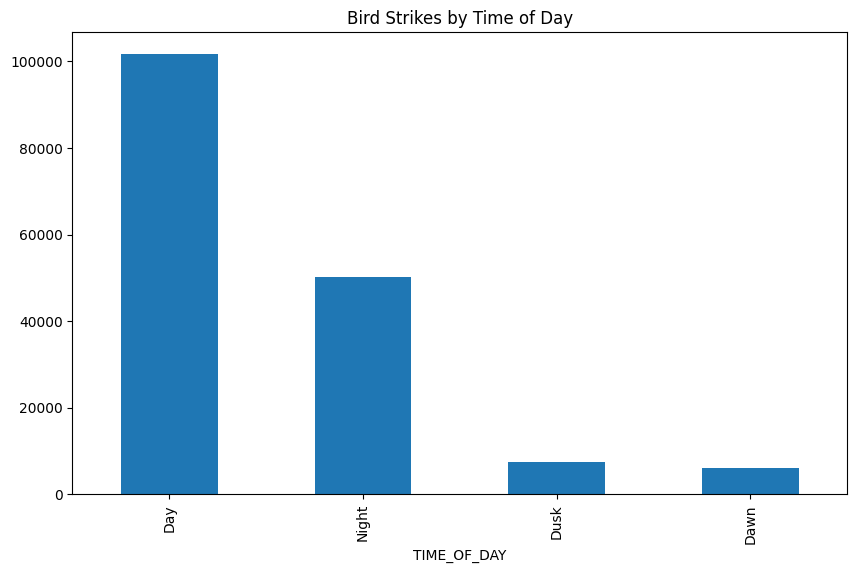

In [23]:
# Common times of day for bird strikes
plt.figure(figsize=(10, 6))
dataframe['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Bird Strikes by Time of Day')

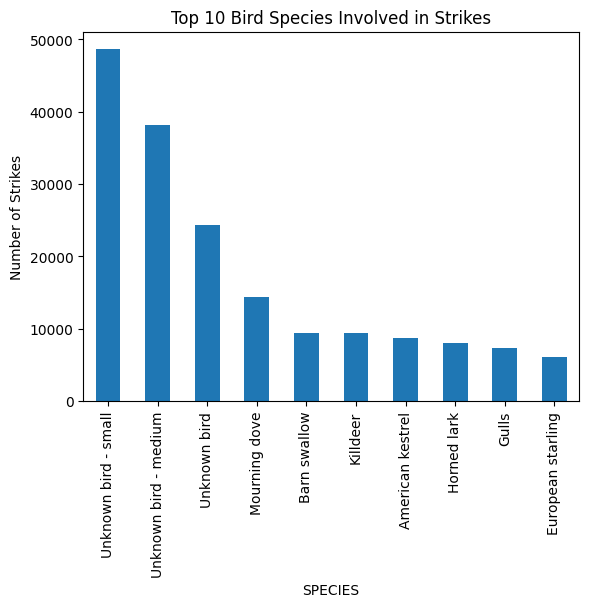

In [17]:
# Species Analysis (Bird Species Involved)
dataframe['SPECIES'].value_counts().head(10).plot(kind='bar', title='Top 10 Bird Species Involved in Strikes')
plt.ylabel('Number of Strikes')
plt.show()

In [24]:
# Numerical Analysis (Descriptive Stats for Cost)
dataframe['COST_REPAIRS_INFL_ADJ'].describe()

count          5090
unique         2942
top       $11930.00
freq             13
Name: COST_REPAIRS_INFL_ADJ, dtype: object

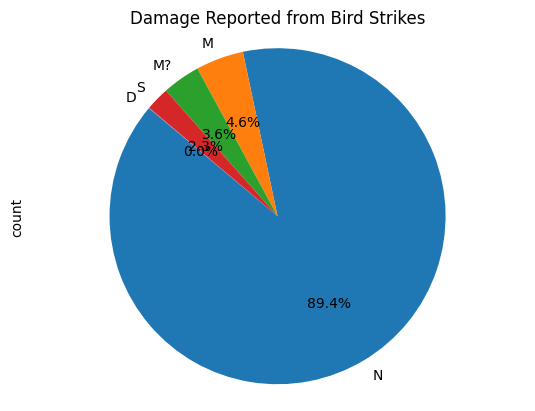

In [19]:
# Faulty graph

# Damage Assessment (Types of Damage Reported)
dataframe['DAMAGE_LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Damage Reported from Bird Strikes')
plt.show()